In [31]:
import numpy as np
import matplotlib.pyplot as plt 
from mpmath import mp
mp.dps = 50


In [32]:
hc = 197.327053
pi = np.pi
r0 = 6.0
a  = 1.0
p0 = .001
rmax =  15.0

def den (r):
    if r < rmax:
        return p0/(1.0 + mp.exp( (r - r0)/a) )
    else:
        return 0.0
    
rho = np.vectorize(den)

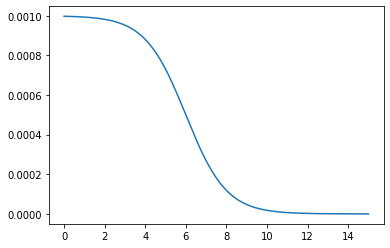

In [33]:
x = np.linspace(0.0,15.0,1000)
y = rho(x)

plt.plot(x,y, '-' )

In [35]:
def form (q):
   # y,err = quad(lambda r:(4.0 * pi) * r * den(r) * np.sin(q*r/hc)/q/hc, 0.0, np.inf)
    return mp.fabs(mp.quad(lambda r:(4.0 * pi) * r * den(r) * mp.sin(q*r/hc)/q/hc, [0, mp.inf]))



In [36]:
form(10.0)
formv = np.vectorize(form)

In [40]:
x1 = np.linspace(10,1000.0,1000)
y1 = formv(x1)

(1e-12, 0.0001)

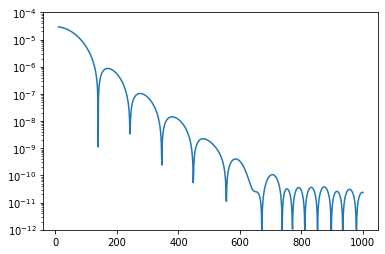

In [41]:
plt.plot(x1,y1)
plt.yscale('log')
plt.ylim(1e-12,1e-4)
